# 1. Install the Quandl library and register for a Quandl account as described in the Exercise.

### Importing data and libraries

In [166]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

### API key

In [167]:
quandl.ApiConfig.api_key = 'NZxD3K4UsacD4P5eSUMB'

# 2. Find a data set to work and import it into your Jupyter notebook.
Ensure that this data somehow connects to the broader research topic for your Achievement project. The best data set would be one that shares a common key with your main data set, such as a geographic component, so you can merge the data, but this could be difficult to find, so it’s not a requirement.

In [168]:
data = quandl.get('EIA/SEDS_P1TXP_CA_A')

## This data is from the US energy information administration data. It contains data on use of asphalt and road oil as well as other petroleum products in california from 1960 - 2019. I chose this data as consumption of petroleum products could be related to environmental outlook.

SEDS_P1TXP_CA_A::Asphalt and road oil, aviation gasoline, kerosene, lubricants, and "other petroleum products" total end-use consumption, California::Thousand barrels

In [169]:
data.head(5)

,Value
Date,
1960-12-31,46536.0
1961-12-31,44833.0
1962-12-31,46836.0
1963-12-31,44664.0
1964-12-31,47418.0


In [170]:
data.tail(5)

,Value
Date,
2015-12-31,50207.0
2016-12-31,52405.0
2017-12-31,52497.0
2018-12-31,53019.0
2019-12-31,51691.0


In [171]:
data.shape

(60, 1)

# 3. Make a subset of your data set if necessary. 

## Since there are already only 60 data points and there is no reason I can think of to limit the years of this time series, I will not make a subset at this time.

# 4. Create a line chart of your data.

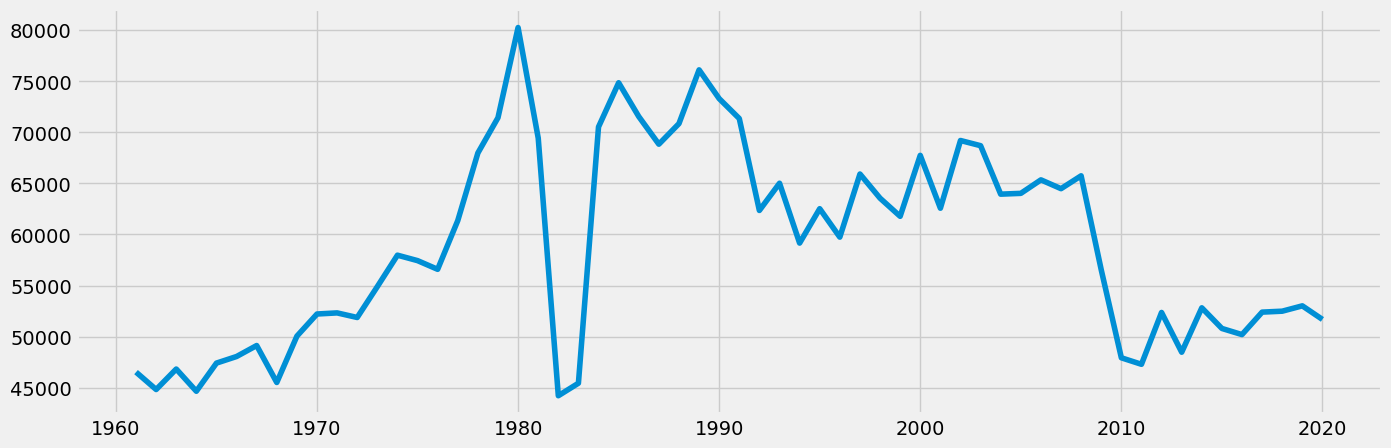

In [172]:
plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

# 5. Decompose the data’s components.
Analyze the results from the plot in a markdown cell.

In [173]:
# Decompose the time series using an additive model since the data does not appear to be exponential

decomposition = sm.tsa.seasonal_decompose(data, model='additive')

In [174]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

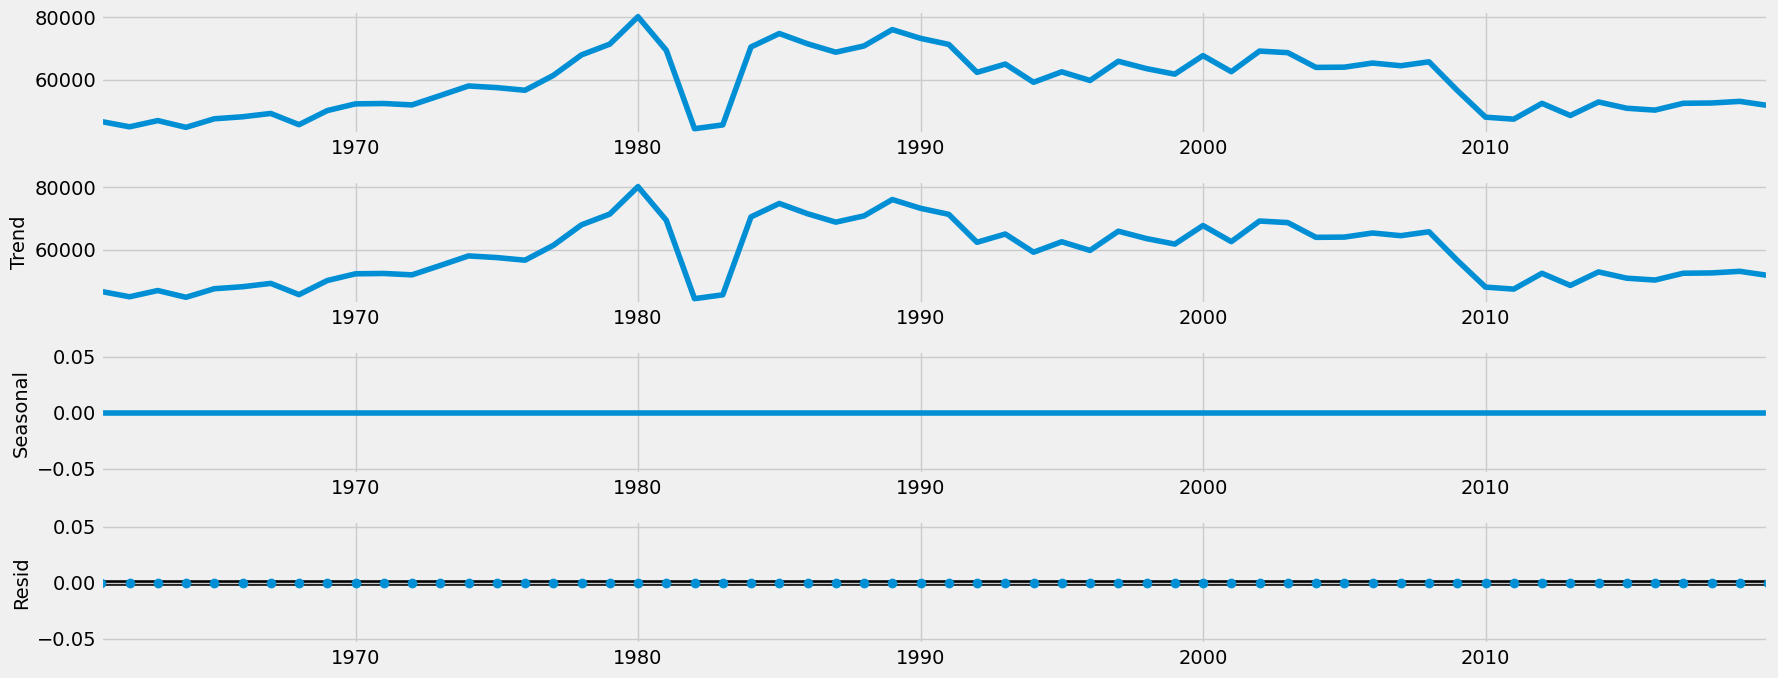

In [175]:
decomposition.plot()
plt.show()

## This shows that there is no seasonality (although the data is collected annually), there is no noise as shown by the residual. This also means that the trend and the level are the same

# 6. Conduct a Dickey-Fuller test to check for stationarity.
Interpret the results in a markdown cell and reference your null hypothesis.


## Hypothesis to test:

null =  there is a unit root (random jump that is not constant) in the data  
alternative = there is no unit root in the data 

In [176]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.239939
p-value                         0.192070
Number of Lags Used             2.000000
Number of Observations Used    57.000000
Critical Value (1%)            -3.550670
Critical Value (5%)            -2.913766
Critical Value (10%)           -2.594624
dtype: float64


## For this data set, the test statistic is larger than the critical values, and the p- value is greater than 0.05. This means we cannot reject the null hypothesis and the data is non-stationary.

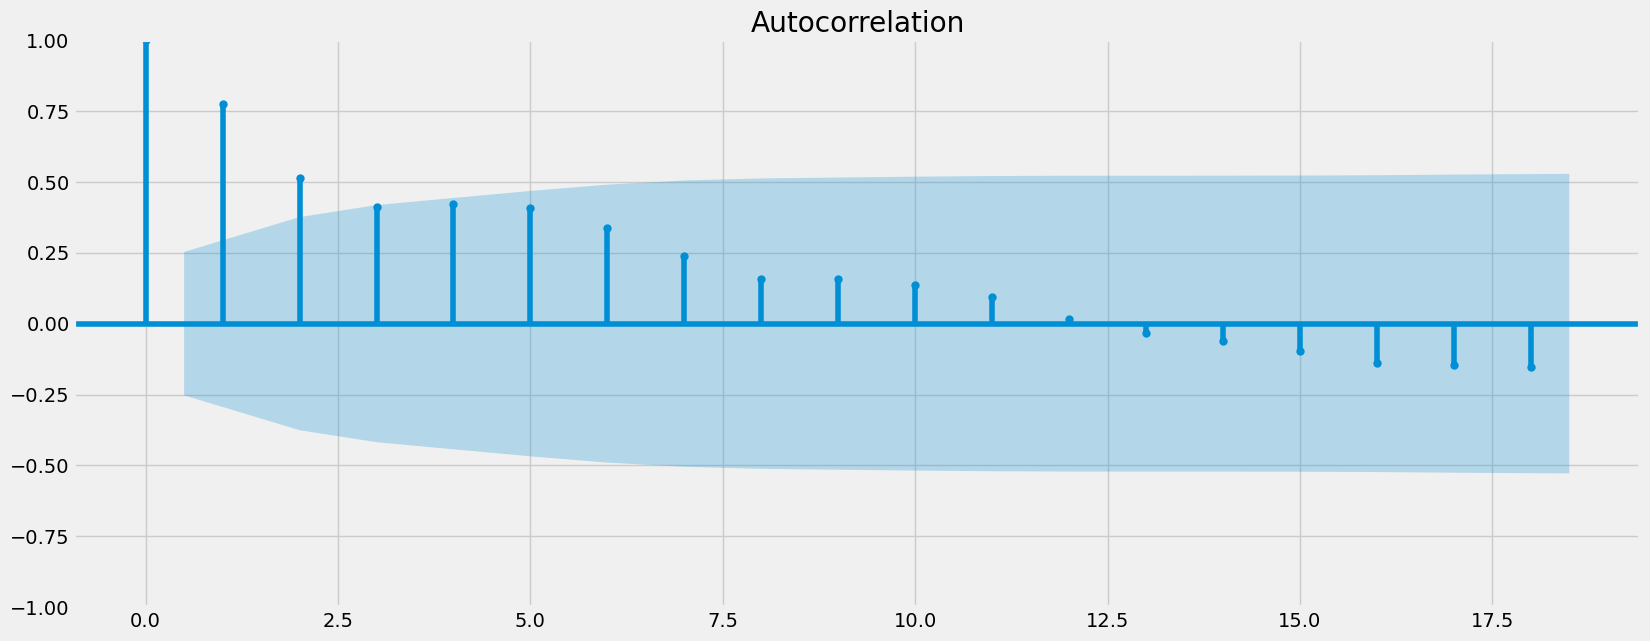

In [177]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data)
plt.show()

# 7. If your data isn’t stationary, conduct a round of differencing on it and repeat step 6.


###
1. Set a new data frame "data_diff" 
2. data.shift(1) - shifts the values in the data frame by one position forward in time. The first value is NaN the rest are one forward.
3. Subtract the shifted data from the original data frame, which will be the difference between the data points in the original and the shifted

In [178]:
data_diff = data - data.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

Since the first value had nothing to be shifted into it, it will be NaN and need to be removed

In [179]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [180]:
data_diff.head()

,Value
Date,
1961-12-31,-1703.0
1962-12-31,2003.0
1963-12-31,-2172.0
1964-12-31,2754.0
1965-12-31,645.0


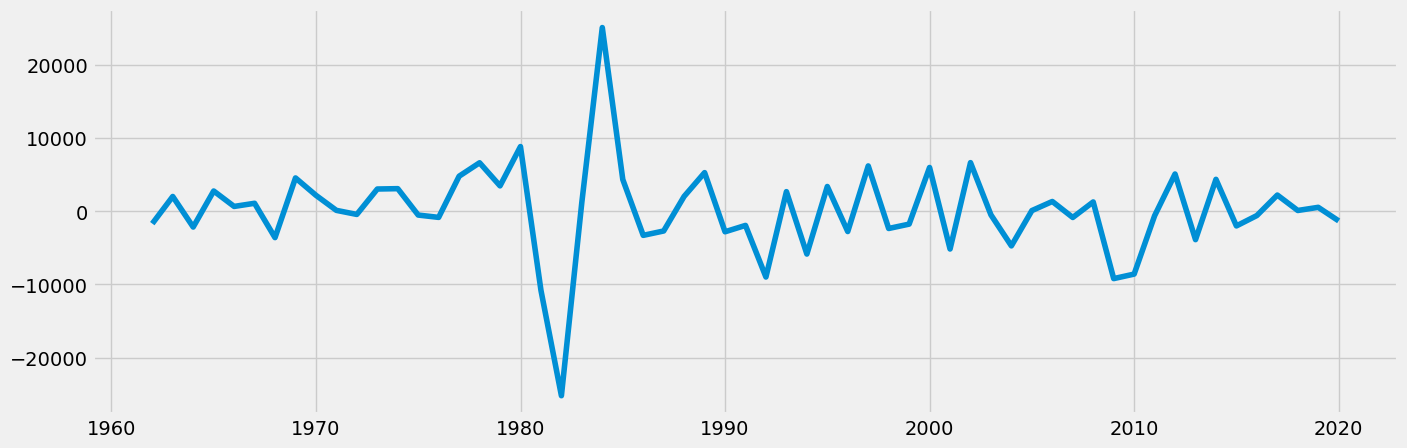

In [181]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

### Check if the null hypothesis can be rejected after differencing 

In [182]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -6.596778e+00
p-value                        6.893796e-09
Number of Lags Used            2.000000e+00
Number of Observations Used    5.600000e+01
Critical Value (1%)           -3.552928e+00
Critical Value (5%)           -2.914731e+00
Critical Value (10%)          -2.595137e+00
dtype: float64


## The test statisitic is now smaller than all the critical values, and the p- value is below 0.05, so the null hypothesis can be rejected and the data can be considered stationary.

# 9. Check your data’s autocorrelations.

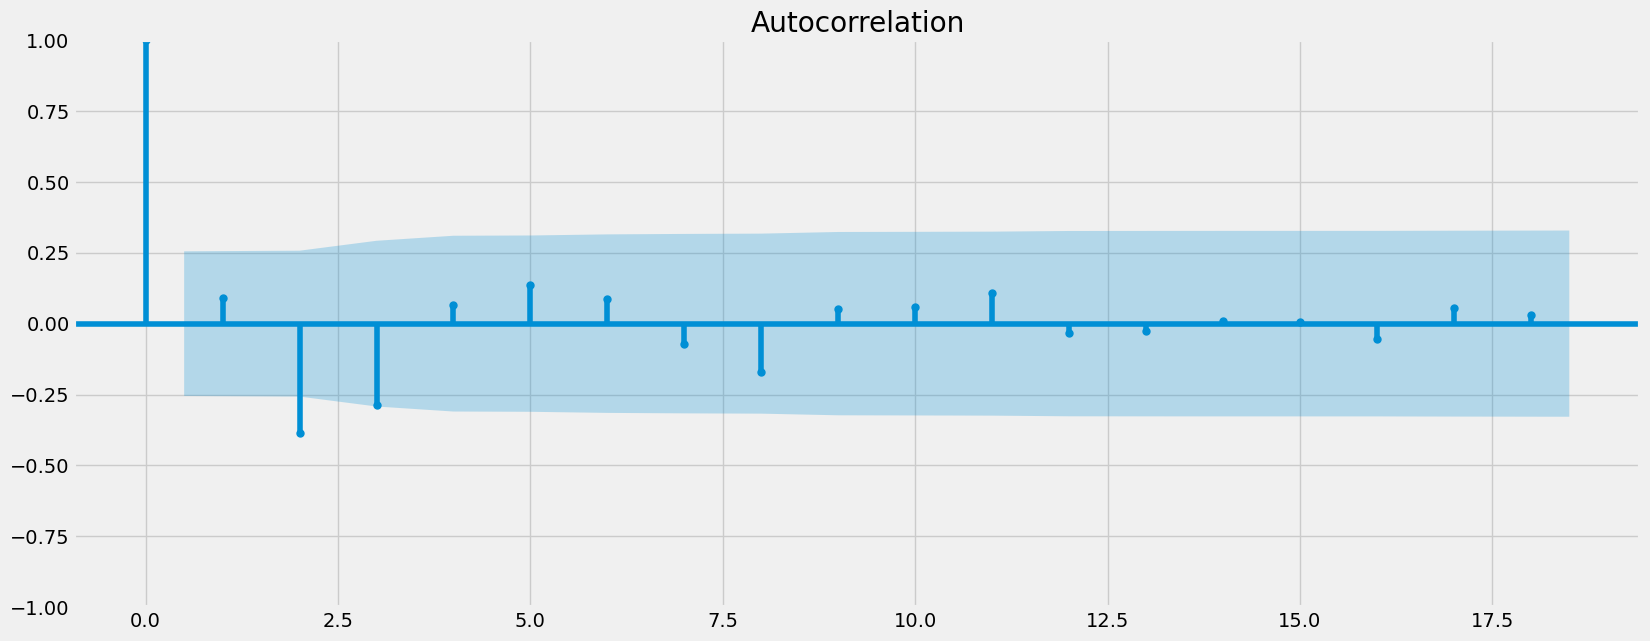

In [183]:
plot_acf(data_diff)
plt.show()

# The majority of the lags are now within the confidence interval, and another round of differencing is not required.

# Bonus Task

## d will = 1 since one round of differencing was required

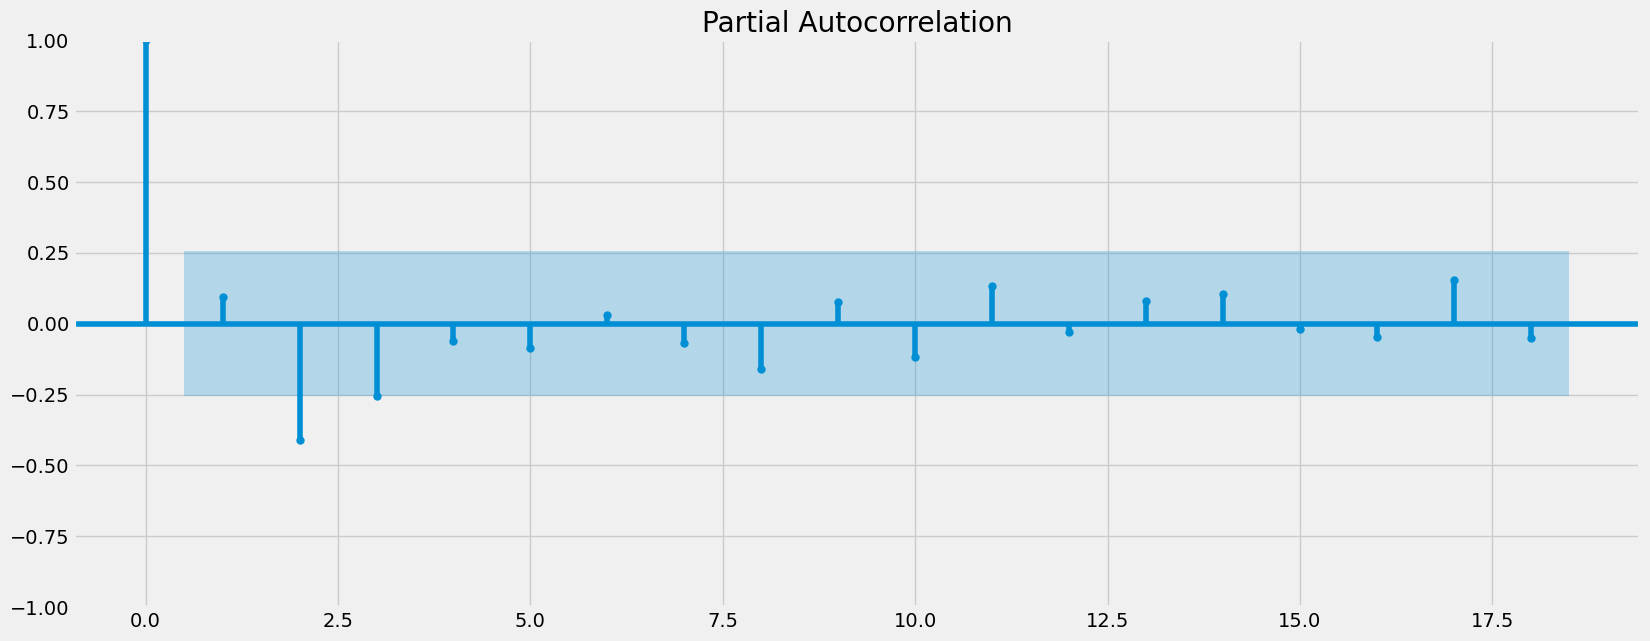

<Figure size 4500x4500 with 0 Axes>

In [184]:
# Plot partial autocorrelations to determine parameter p

plot_pacf(data_diff)
plt.figure(figsize=(15,15), dpi=300)
plt.show()

## There are not significant positive bars in this partial autocorrelation, so I will start with p=1

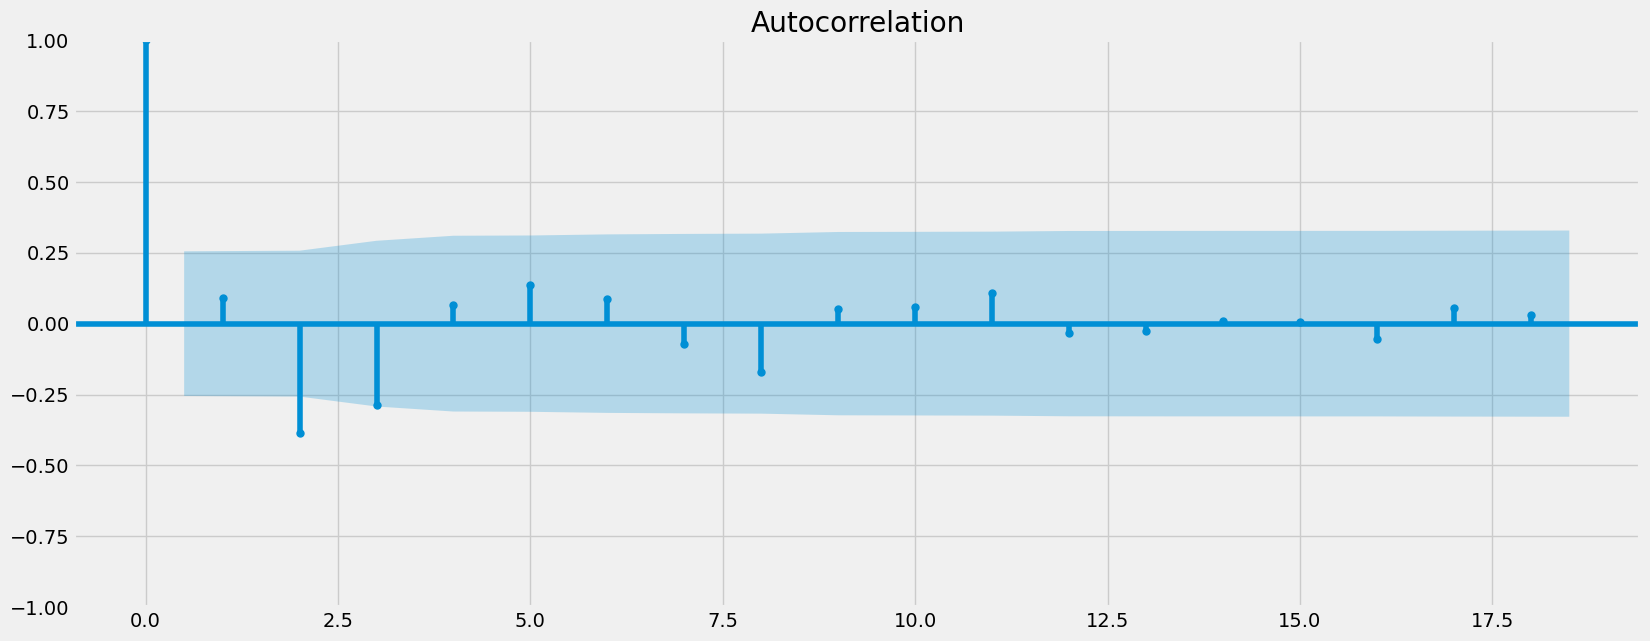

<Figure size 1500x500 with 0 Axes>

In [185]:
plot_acf(data_diff)
plt.figure(figsize=(15,5), dpi=100)
plt.show()

## There are not significant  bars in this autocorrelation, so I will start with q=1

## I will divide the data set at 75% 

In [186]:
train = data_diff['Value'][:45]
test = data_diff['Value'][44:]

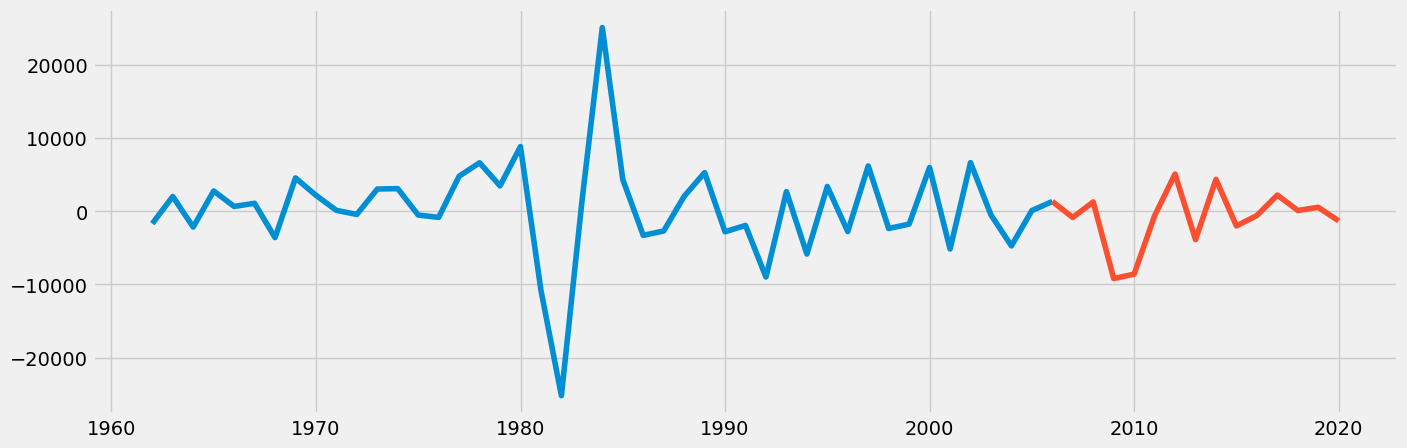

In [187]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(train)
plt.plot(test)

### Importing the ARIMA model and getting the test data set size

In [206]:
from statsmodels.tsa.arima.model  import ARIMA # Import the model you need

In [192]:
test.shape

(15,)

### Testing the model using p= 1, d=1, q=1

In [208]:
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit()  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf

# Make into pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   45
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -451.774
Date:                Wed, 12 Jul 2023   AIC                            909.549
Time:                        21:34:56   BIC                            914.901
Sample:                    12-31-1961   HQIC                           911.534
                         - 12-31-2005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1015      0.170      0.597      0.550      -0.232       0.435
ma.L1         -1.0000      0.141     -7.076      0.000      -1.277      -0.723
sigma2      4.528e+07   3.12e-09   1.45e+16      0.0

ValueError: too many values to unpack (expected 3)